In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [3]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
# normalizing data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [6]:
# implement k-fold validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    
    # prepare validation data from partition #k
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    # prepare training data from all other partition
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]], 
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=1)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [7]:
all_scores

[2.0956787838794217, 2.220593797098292, 2.859968412040484, 2.40535704039111]

In [8]:
np.mean(all_scores)

2.3953995083523267

In [10]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # prepare validation data from partition #k
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    # prepare training data from all other partition
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]], 
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    
    mae_history = history.history['val_mean_absolute_error']
    
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 4ms/step - loss: 172.3064 - mean_absolute_error: 9.9995 - val_loss: 30.3667 - val_mean_absolute_error: 3.8352
Epoch 2/500
303/303 [==============================] - 1s 3ms/step - loss: 26.5979 - mean_absolute_error: 3.5060 - val_loss: 20.3579 - val_mean_absolute_error: 2.7898
Epoch 3/500
303/303 [==============================] - 1s 3ms/step - loss: 19.3642 - mean_absolute_error: 2.8775 - val_loss: 17.4801 - val_mean_absolute_error: 2.5965
Epoch 4/500
303/303 [==============================] - 1s 3ms/step - loss: 17.6777 - mean_absolute_error: 2.7136 - val_loss: 14.9171 - val_mean_absolute_error: 2.3453
Epoch 5/500
303/303 [==============================] - 1s 3ms/step - loss: 16.0331 - mean_absolute_error: 2.6369 - val_loss: 15.0310 - val_mean_absolute_error: 2.4165
Epoch 6/500
303/303 [==============================] - 1s 3ms/step - loss: 14.7644 - mean_absolute

Epoch 50/500
303/303 [==============================] - 1s 3ms/step - loss: 7.2710 - mean_absolute_error: 1.7456 - val_loss: 8.7438 - val_mean_absolute_error: 1.8785
Epoch 51/500
303/303 [==============================] - 1s 3ms/step - loss: 6.9178 - mean_absolute_error: 1.7162 - val_loss: 8.0774 - val_mean_absolute_error: 1.8601
Epoch 52/500
303/303 [==============================] - 1s 3ms/step - loss: 6.6910 - mean_absolute_error: 1.7590 - val_loss: 10.1775 - val_mean_absolute_error: 2.0369
Epoch 53/500
303/303 [==============================] - 1s 3ms/step - loss: 6.5547 - mean_absolute_error: 1.7245 - val_loss: 11.8874 - val_mean_absolute_error: 2.6132
Epoch 54/500
303/303 [==============================] - 1s 3ms/step - loss: 6.5378 - mean_absolute_error: 1.7093 - val_loss: 10.3978 - val_mean_absolute_error: 2.2615
Epoch 55/500
303/303 [==============================] - 1s 3ms/step - loss: 6.6602 - mean_absolute_error: 1.7141 - val_loss: 7.5916 - val_mean_absolute_error: 1.8000
E

303/303 [==============================] - 1s 3ms/step - loss: 4.0968 - mean_absolute_error: 1.3822 - val_loss: 9.3729 - val_mean_absolute_error: 2.1186
Epoch 100/500
303/303 [==============================] - 1s 3ms/step - loss: 4.1105 - mean_absolute_error: 1.3930 - val_loss: 9.1467 - val_mean_absolute_error: 2.1045
Epoch 101/500
303/303 [==============================] - 1s 3ms/step - loss: 4.2404 - mean_absolute_error: 1.4048 - val_loss: 8.8174 - val_mean_absolute_error: 2.0319
Epoch 102/500
303/303 [==============================] - 1s 3ms/step - loss: 4.1978 - mean_absolute_error: 1.3975 - val_loss: 9.9885 - val_mean_absolute_error: 2.0256
Epoch 103/500
303/303 [==============================] - 1s 3ms/step - loss: 4.2501 - mean_absolute_error: 1.3892 - val_loss: 9.7793 - val_mean_absolute_error: 2.0585
Epoch 104/500
303/303 [==============================] - 1s 3ms/step - loss: 4.3293 - mean_absolute_error: 1.4126 - val_loss: 8.3924 - val_mean_absolute_error: 1.9431
Epoch 105/50

303/303 [==============================] - 1s 3ms/step - loss: 2.8897 - mean_absolute_error: 1.2189 - val_loss: 9.5629 - val_mean_absolute_error: 2.1991
Epoch 149/500
303/303 [==============================] - 1s 3ms/step - loss: 2.7766 - mean_absolute_error: 1.2265 - val_loss: 11.2757 - val_mean_absolute_error: 2.4545
Epoch 150/500
303/303 [==============================] - 1s 3ms/step - loss: 2.8780 - mean_absolute_error: 1.2446 - val_loss: 10.0458 - val_mean_absolute_error: 2.2860
Epoch 151/500
303/303 [==============================] - 1s 3ms/step - loss: 2.7757 - mean_absolute_error: 1.1971 - val_loss: 11.3175 - val_mean_absolute_error: 2.2487
Epoch 152/500
303/303 [==============================] - 1s 3ms/step - loss: 2.8273 - mean_absolute_error: 1.2223 - val_loss: 14.7177 - val_mean_absolute_error: 2.7157
Epoch 153/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5846 - mean_absolute_error: 1.1325 - val_loss: 10.4123 - val_mean_absolute_error: 2.2420
Epoch 1

Epoch 197/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1568 - mean_absolute_error: 1.0125 - val_loss: 12.5432 - val_mean_absolute_error: 2.3992
Epoch 198/500
303/303 [==============================] - 1s 3ms/step - loss: 2.3084 - mean_absolute_error: 1.0566 - val_loss: 12.3530 - val_mean_absolute_error: 2.4543
Epoch 199/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9473 - mean_absolute_error: 0.9888 - val_loss: 13.1649 - val_mean_absolute_error: 2.4635
Epoch 200/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0625 - mean_absolute_error: 1.0823 - val_loss: 13.5042 - val_mean_absolute_error: 2.4697
Epoch 201/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0958 - mean_absolute_error: 1.0394 - val_loss: 11.5249 - val_mean_absolute_error: 2.4425
Epoch 202/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8237 - mean_absolute_error: 0.9941 - val_loss: 14.6309 - val_mean_absolute_error:

Epoch 246/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5205 - mean_absolute_error: 0.8915 - val_loss: 13.3775 - val_mean_absolute_error: 2.4691
Epoch 247/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6889 - mean_absolute_error: 0.9605 - val_loss: 13.6407 - val_mean_absolute_error: 2.5278
Epoch 248/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7173 - mean_absolute_error: 0.9178 - val_loss: 13.3892 - val_mean_absolute_error: 2.5045
Epoch 249/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7168 - mean_absolute_error: 0.9892 - val_loss: 12.8886 - val_mean_absolute_error: 2.5923
Epoch 250/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5717 - mean_absolute_error: 0.8765 - val_loss: 12.6573 - val_mean_absolute_error: 2.6128
Epoch 251/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5411 - mean_absolute_error: 0.8861 - val_loss: 11.2877 - val_mean_absolute_error:

Epoch 295/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3412 - mean_absolute_error: 0.8826 - val_loss: 11.2964 - val_mean_absolute_error: 2.4308
Epoch 296/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6971 - mean_absolute_error: 0.9039 - val_loss: 12.5065 - val_mean_absolute_error: 2.4987
Epoch 297/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5451 - mean_absolute_error: 0.8590 - val_loss: 13.9300 - val_mean_absolute_error: 2.6319
Epoch 298/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3784 - mean_absolute_error: 0.8497 - val_loss: 10.4812 - val_mean_absolute_error: 2.3431
Epoch 299/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2840 - mean_absolute_error: 0.8187 - val_loss: 10.2815 - val_mean_absolute_error: 2.3121
Epoch 300/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4928 - mean_absolute_error: 0.8613 - val_loss: 12.0028 - val_mean_absolute_error:

Epoch 344/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3555 - mean_absolute_error: 0.7864 - val_loss: 12.5983 - val_mean_absolute_error: 2.5273
Epoch 345/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2025 - mean_absolute_error: 0.7616 - val_loss: 10.8356 - val_mean_absolute_error: 2.3878
Epoch 346/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1202 - mean_absolute_error: 0.7515 - val_loss: 11.9671 - val_mean_absolute_error: 2.4921
Epoch 347/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1947 - mean_absolute_error: 0.7839 - val_loss: 11.6296 - val_mean_absolute_error: 2.4572
Epoch 348/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1999 - mean_absolute_error: 0.8118 - val_loss: 10.0486 - val_mean_absolute_error: 2.3135
Epoch 349/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9691 - mean_absolute_error: 0.7207 - val_loss: 10.1533 - val_mean_absolute_error:

Epoch 393/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9912 - mean_absolute_error: 0.7230 - val_loss: 11.0609 - val_mean_absolute_error: 2.3582
Epoch 394/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9936 - mean_absolute_error: 0.7397 - val_loss: 9.4131 - val_mean_absolute_error: 2.2890
Epoch 395/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2105 - mean_absolute_error: 0.7563 - val_loss: 10.5552 - val_mean_absolute_error: 2.3393
Epoch 396/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1892 - mean_absolute_error: 0.7558 - val_loss: 11.7312 - val_mean_absolute_error: 2.4339
Epoch 397/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1013 - mean_absolute_error: 0.7505 - val_loss: 9.8275 - val_mean_absolute_error: 2.3201
Epoch 398/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1591 - mean_absolute_error: 0.7349 - val_loss: 10.6486 - val_mean_absolute_error: 2

Epoch 442/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9592 - mean_absolute_error: 0.7112 - val_loss: 14.0773 - val_mean_absolute_error: 2.7413
Epoch 443/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9348 - mean_absolute_error: 0.7031 - val_loss: 11.5898 - val_mean_absolute_error: 2.3897
Epoch 444/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0712 - mean_absolute_error: 0.7474 - val_loss: 9.6428 - val_mean_absolute_error: 2.2797
Epoch 445/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9498 - mean_absolute_error: 0.7216 - val_loss: 11.2490 - val_mean_absolute_error: 2.4899
Epoch 446/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0440 - mean_absolute_error: 0.7470 - val_loss: 11.8555 - val_mean_absolute_error: 2.5842
Epoch 447/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0339 - mean_absolute_error: 0.7423 - val_loss: 11.5011 - val_mean_absolute_error: 

303/303 [==============================] - 1s 3ms/step - loss: 0.8644 - mean_absolute_error: 0.6906 - val_loss: 9.1545 - val_mean_absolute_error: 2.2158
Epoch 491/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8954 - mean_absolute_error: 0.6724 - val_loss: 10.9634 - val_mean_absolute_error: 2.4769
Epoch 492/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0058 - mean_absolute_error: 0.7234 - val_loss: 11.4625 - val_mean_absolute_error: 2.5557
Epoch 493/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8152 - mean_absolute_error: 0.6180 - val_loss: 12.9425 - val_mean_absolute_error: 2.6564
Epoch 494/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0951 - mean_absolute_error: 0.7330 - val_loss: 9.7459 - val_mean_absolute_error: 2.3512
Epoch 495/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8910 - mean_absolute_error: 0.6815 - val_loss: 10.0147 - val_mean_absolute_error: 2.4132
Epoch 49

Epoch 39/500
303/303 [==============================] - 1s 3ms/step - loss: 6.6501 - mean_absolute_error: 1.7071 - val_loss: 9.5212 - val_mean_absolute_error: 2.3876
Epoch 40/500
303/303 [==============================] - 1s 3ms/step - loss: 6.3977 - mean_absolute_error: 1.6512 - val_loss: 9.1378 - val_mean_absolute_error: 2.3213
Epoch 41/500
303/303 [==============================] - 1s 3ms/step - loss: 6.1879 - mean_absolute_error: 1.7070 - val_loss: 9.2640 - val_mean_absolute_error: 2.3251
Epoch 42/500
303/303 [==============================] - 1s 3ms/step - loss: 6.0071 - mean_absolute_error: 1.6619 - val_loss: 7.9155 - val_mean_absolute_error: 2.1964
Epoch 43/500
303/303 [==============================] - 1s 3ms/step - loss: 6.4136 - mean_absolute_error: 1.6452 - val_loss: 9.5943 - val_mean_absolute_error: 2.3399
Epoch 44/500
303/303 [==============================] - 1s 3ms/step - loss: 5.8621 - mean_absolute_error: 1.6136 - val_loss: 9.1686 - val_mean_absolute_error: 2.3233
Epoc

303/303 [==============================] - 1s 3ms/step - loss: 3.9503 - mean_absolute_error: 1.3615 - val_loss: 12.8425 - val_mean_absolute_error: 2.4743
Epoch 89/500
303/303 [==============================] - 1s 3ms/step - loss: 3.5172 - mean_absolute_error: 1.3372 - val_loss: 13.5307 - val_mean_absolute_error: 2.4887
Epoch 90/500
303/303 [==============================] - 1s 3ms/step - loss: 3.6660 - mean_absolute_error: 1.2425 - val_loss: 15.9853 - val_mean_absolute_error: 2.6302
Epoch 91/500
303/303 [==============================] - 1s 3ms/step - loss: 3.7057 - mean_absolute_error: 1.2969 - val_loss: 17.5106 - val_mean_absolute_error: 2.8427
Epoch 92/500
303/303 [==============================] - 1s 3ms/step - loss: 3.4638 - mean_absolute_error: 1.2950 - val_loss: 14.1176 - val_mean_absolute_error: 2.4867
Epoch 93/500
303/303 [==============================] - 1s 3ms/step - loss: 3.4942 - mean_absolute_error: 1.2719 - val_loss: 16.8051 - val_mean_absolute_error: 2.7430
Epoch 94/50

303/303 [==============================] - 1s 3ms/step - loss: 2.5323 - mean_absolute_error: 1.1323 - val_loss: 13.6974 - val_mean_absolute_error: 2.5519
Epoch 137/500
303/303 [==============================] - 1s 3ms/step - loss: 2.4365 - mean_absolute_error: 1.0631 - val_loss: 20.7262 - val_mean_absolute_error: 2.8715
Epoch 138/500
303/303 [==============================] - 1s 3ms/step - loss: 2.6270 - mean_absolute_error: 1.1346 - val_loss: 13.2137 - val_mean_absolute_error: 2.4498
Epoch 139/500
303/303 [==============================] - 1s 3ms/step - loss: 2.4130 - mean_absolute_error: 1.0758 - val_loss: 15.5023 - val_mean_absolute_error: 2.5368
Epoch 140/500
303/303 [==============================] - 1s 3ms/step - loss: 2.4838 - mean_absolute_error: 1.1200 - val_loss: 16.7999 - val_mean_absolute_error: 2.6410
Epoch 141/500
303/303 [==============================] - 1s 3ms/step - loss: 2.3875 - mean_absolute_error: 1.1234 - val_loss: 14.2830 - val_mean_absolute_error: 2.4794
Epoch 

Epoch 185/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9831 - mean_absolute_error: 1.0386 - val_loss: 15.4229 - val_mean_absolute_error: 2.5842
Epoch 186/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7721 - mean_absolute_error: 0.9589 - val_loss: 16.9917 - val_mean_absolute_error: 2.7221
Epoch 187/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7890 - mean_absolute_error: 0.9806 - val_loss: 20.2633 - val_mean_absolute_error: 2.9939
Epoch 188/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9960 - mean_absolute_error: 1.0138 - val_loss: 19.5237 - val_mean_absolute_error: 2.8679
Epoch 189/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7487 - mean_absolute_error: 0.9635 - val_loss: 20.5454 - val_mean_absolute_error: 2.9105
Epoch 190/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9844 - mean_absolute_error: 1.0210 - val_loss: 18.2035 - val_mean_absolute_error:

Epoch 234/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3616 - mean_absolute_error: 0.8800 - val_loss: 27.9141 - val_mean_absolute_error: 3.3319
Epoch 235/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4459 - mean_absolute_error: 0.8675 - val_loss: 21.3813 - val_mean_absolute_error: 2.9732
Epoch 236/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3296 - mean_absolute_error: 0.8425 - val_loss: 20.1697 - val_mean_absolute_error: 2.8391
Epoch 237/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4434 - mean_absolute_error: 0.8760 - val_loss: 19.8430 - val_mean_absolute_error: 2.9203
Epoch 238/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3436 - mean_absolute_error: 0.8679 - val_loss: 24.2942 - val_mean_absolute_error: 3.1491
Epoch 239/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4101 - mean_absolute_error: 0.9040 - val_loss: 22.7920 - val_mean_absolute_error:

Epoch 283/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2473 - mean_absolute_error: 0.8613 - val_loss: 22.3466 - val_mean_absolute_error: 3.0684
Epoch 284/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0256 - mean_absolute_error: 0.7550 - val_loss: 24.3497 - val_mean_absolute_error: 3.0003
Epoch 285/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1286 - mean_absolute_error: 0.8039 - val_loss: 32.0461 - val_mean_absolute_error: 3.3308
Epoch 286/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0681 - mean_absolute_error: 0.7660 - val_loss: 25.2472 - val_mean_absolute_error: 3.0982
Epoch 287/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1147 - mean_absolute_error: 0.7881 - val_loss: 21.7031 - val_mean_absolute_error: 3.1895
Epoch 288/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1725 - mean_absolute_error: 0.8021 - val_loss: 25.3273 - val_mean_absolute_error:

Epoch 332/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9786 - mean_absolute_error: 0.7372 - val_loss: 18.5888 - val_mean_absolute_error: 2.7660
Epoch 333/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9763 - mean_absolute_error: 0.7303 - val_loss: 25.8724 - val_mean_absolute_error: 3.1850
Epoch 334/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1821 - mean_absolute_error: 0.8114 - val_loss: 20.8186 - val_mean_absolute_error: 2.8793
Epoch 335/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0799 - mean_absolute_error: 0.7671 - val_loss: 22.5609 - val_mean_absolute_error: 2.9317
Epoch 336/500
303/303 [==============================] - ETA: 0s - loss: 1.0544 - mean_absolute_error: 0.741 - 1s 3ms/step - loss: 1.0543 - mean_absolute_error: 0.7437 - val_loss: 22.1834 - val_mean_absolute_error: 2.9685
Epoch 337/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0689 - mean_absolute_error:

303/303 [==============================] - 1s 3ms/step - loss: 0.9260 - mean_absolute_error: 0.7334 - val_loss: 20.0233 - val_mean_absolute_error: 2.9164
Epoch 381/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9170 - mean_absolute_error: 0.7214 - val_loss: 26.4715 - val_mean_absolute_error: 3.2992
Epoch 382/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8546 - mean_absolute_error: 0.7111 - val_loss: 23.9990 - val_mean_absolute_error: 3.1879
Epoch 383/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9191 - mean_absolute_error: 0.6991 - val_loss: 18.7147 - val_mean_absolute_error: 2.8353
Epoch 384/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8604 - mean_absolute_error: 0.6868 - val_loss: 20.6734 - val_mean_absolute_error: 2.9393
Epoch 385/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9076 - mean_absolute_error: 0.7481 - val_loss: 19.2185 - val_mean_absolute_error: 2.8157
Epoch 

Epoch 429/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7195 - mean_absolute_error: 0.6356 - val_loss: 21.2411 - val_mean_absolute_error: 2.8531
Epoch 430/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9419 - mean_absolute_error: 0.7050 - val_loss: 25.2853 - val_mean_absolute_error: 3.0090
Epoch 431/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7647 - mean_absolute_error: 0.6530 - val_loss: 27.8980 - val_mean_absolute_error: 3.1552
Epoch 432/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8385 - mean_absolute_error: 0.6630 - val_loss: 22.0897 - val_mean_absolute_error: 3.0217
Epoch 433/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8387 - mean_absolute_error: 0.6877 - val_loss: 18.1024 - val_mean_absolute_error: 2.8130
Epoch 434/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8166 - mean_absolute_error: 0.6806 - val_loss: 23.1543 - val_mean_absolute_error:

Epoch 478/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7411 - mean_absolute_error: 0.6435 - val_loss: 21.3061 - val_mean_absolute_error: 2.9851
Epoch 479/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7820 - mean_absolute_error: 0.6317 - val_loss: 24.1713 - val_mean_absolute_error: 3.1523
Epoch 480/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7321 - mean_absolute_error: 0.6358 - val_loss: 17.6159 - val_mean_absolute_error: 2.8214
Epoch 481/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7978 - mean_absolute_error: 0.6463 - val_loss: 26.8776 - val_mean_absolute_error: 3.1531
Epoch 482/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7430 - mean_absolute_error: 0.6250 - val_loss: 18.3022 - val_mean_absolute_error: 2.8985
Epoch 483/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8914 - mean_absolute_error: 0.6242 - val_loss: 22.9474 - val_mean_absolute_error:

303/303 [==============================] - 1s 3ms/step - loss: 7.7033 - mean_absolute_error: 1.8445 - val_loss: 13.3768 - val_mean_absolute_error: 2.3919
Epoch 27/500
303/303 [==============================] - 1s 3ms/step - loss: 7.1993 - mean_absolute_error: 1.7667 - val_loss: 13.0955 - val_mean_absolute_error: 2.3754
Epoch 28/500
303/303 [==============================] - 1s 3ms/step - loss: 6.9528 - mean_absolute_error: 1.8314 - val_loss: 17.8688 - val_mean_absolute_error: 2.8427
Epoch 29/500
303/303 [==============================] - 1s 3ms/step - loss: 6.7335 - mean_absolute_error: 1.8098 - val_loss: 15.1585 - val_mean_absolute_error: 2.5556
Epoch 30/500
303/303 [==============================] - 1s 3ms/step - loss: 6.5955 - mean_absolute_error: 1.7715 - val_loss: 16.7483 - val_mean_absolute_error: 2.6413
Epoch 31/500
303/303 [==============================] - 1s 3ms/step - loss: 6.8503 - mean_absolute_error: 1.7532 - val_loss: 13.6484 - val_mean_absolute_error: 2.5789
Epoch 32/50

303/303 [==============================] - 1s 3ms/step - loss: 4.1822 - mean_absolute_error: 1.3846 - val_loss: 14.0561 - val_mean_absolute_error: 2.5627
Epoch 76/500
303/303 [==============================] - 1s 3ms/step - loss: 3.9714 - mean_absolute_error: 1.3951 - val_loss: 13.7451 - val_mean_absolute_error: 2.4670
Epoch 77/500
303/303 [==============================] - 1s 3ms/step - loss: 4.2668 - mean_absolute_error: 1.4029 - val_loss: 15.9813 - val_mean_absolute_error: 2.6588
Epoch 78/500
303/303 [==============================] - 1s 3ms/step - loss: 4.0847 - mean_absolute_error: 1.4473 - val_loss: 15.2448 - val_mean_absolute_error: 2.6687
Epoch 79/500
303/303 [==============================] - 1s 3ms/step - loss: 3.9559 - mean_absolute_error: 1.4242 - val_loss: 13.4555 - val_mean_absolute_error: 2.4647
Epoch 80/500
303/303 [==============================] - 1s 3ms/step - loss: 3.6947 - mean_absolute_error: 1.3819 - val_loss: 14.6949 - val_mean_absolute_error: 2.5754
Epoch 81/50

Epoch 124/500
303/303 [==============================] - 1s 3ms/step - loss: 2.6940 - mean_absolute_error: 1.1486 - val_loss: 14.5914 - val_mean_absolute_error: 2.5769
Epoch 125/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5258 - mean_absolute_error: 1.1604 - val_loss: 16.2134 - val_mean_absolute_error: 2.6970
Epoch 126/500
303/303 [==============================] - 1s 3ms/step - loss: 2.8178 - mean_absolute_error: 1.1812 - val_loss: 15.0785 - val_mean_absolute_error: 2.7424
Epoch 127/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5850 - mean_absolute_error: 1.1400 - val_loss: 15.6374 - val_mean_absolute_error: 2.7452
Epoch 128/500
303/303 [==============================] - 1s 3ms/step - loss: 2.7746 - mean_absolute_error: 1.2107 - val_loss: 14.1161 - val_mean_absolute_error: 2.5661
Epoch 129/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5400 - mean_absolute_error: 1.1642 - val_loss: 15.3162 - val_mean_absolute_error:

Epoch 173/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0573 - mean_absolute_error: 0.9668 - val_loss: 14.1671 - val_mean_absolute_error: 2.6686
Epoch 174/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8962 - mean_absolute_error: 0.9809 - val_loss: 15.3321 - val_mean_absolute_error: 2.6959
Epoch 175/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8942 - mean_absolute_error: 0.9884 - val_loss: 15.0827 - val_mean_absolute_error: 2.6125
Epoch 176/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8192 - mean_absolute_error: 1.0139 - val_loss: 17.4374 - val_mean_absolute_error: 2.9285
Epoch 177/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0004 - mean_absolute_error: 1.0288 - val_loss: 17.0468 - val_mean_absolute_error: 2.8415
Epoch 178/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8425 - mean_absolute_error: 0.9708 - val_loss: 15.3395 - val_mean_absolute_error:

Epoch 222/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5074 - mean_absolute_error: 0.8828 - val_loss: 14.1283 - val_mean_absolute_error: 2.5693
Epoch 223/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4790 - mean_absolute_error: 0.8826 - val_loss: 14.1715 - val_mean_absolute_error: 2.6369
Epoch 224/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5819 - mean_absolute_error: 0.9111 - val_loss: 14.5382 - val_mean_absolute_error: 2.6400
Epoch 225/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5298 - mean_absolute_error: 0.8885 - val_loss: 14.5839 - val_mean_absolute_error: 2.6340
Epoch 226/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3986 - mean_absolute_error: 0.8936 - val_loss: 14.7172 - val_mean_absolute_error: 2.6517
Epoch 227/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5176 - mean_absolute_error: 0.9042 - val_loss: 14.7591 - val_mean_absolute_error:

Epoch 271/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2234 - mean_absolute_error: 0.7852 - val_loss: 15.2843 - val_mean_absolute_error: 2.7346
Epoch 272/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3737 - mean_absolute_error: 0.8270 - val_loss: 13.6063 - val_mean_absolute_error: 2.6400
Epoch 273/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1727 - mean_absolute_error: 0.7770 - val_loss: 15.1685 - val_mean_absolute_error: 2.7450
Epoch 274/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2941 - mean_absolute_error: 0.8334 - val_loss: 16.9269 - val_mean_absolute_error: 2.7755
Epoch 275/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3373 - mean_absolute_error: 0.8461 - val_loss: 14.9288 - val_mean_absolute_error: 2.7681
Epoch 276/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2946 - mean_absolute_error: 0.8076 - val_loss: 15.0470 - val_mean_absolute_error:

Epoch 320/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0877 - mean_absolute_error: 0.7735 - val_loss: 14.1688 - val_mean_absolute_error: 2.7444
Epoch 321/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1374 - mean_absolute_error: 0.7685 - val_loss: 14.6556 - val_mean_absolute_error: 2.7524
Epoch 322/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1810 - mean_absolute_error: 0.7857 - val_loss: 13.5958 - val_mean_absolute_error: 2.5622
Epoch 323/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1631 - mean_absolute_error: 0.7581 - val_loss: 14.0584 - val_mean_absolute_error: 2.7317
Epoch 324/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1237 - mean_absolute_error: 0.7668 - val_loss: 13.4368 - val_mean_absolute_error: 2.6079
Epoch 325/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1117 - mean_absolute_error: 0.7732 - val_loss: 14.3184 - val_mean_absolute_error:

Epoch 369/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0131 - mean_absolute_error: 0.7256 - val_loss: 14.4552 - val_mean_absolute_error: 2.6352
Epoch 370/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9791 - mean_absolute_error: 0.7183 - val_loss: 14.4866 - val_mean_absolute_error: 2.6476
Epoch 371/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0609 - mean_absolute_error: 0.7542 - val_loss: 13.0281 - val_mean_absolute_error: 2.4843
Epoch 372/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9833 - mean_absolute_error: 0.7058 - val_loss: 14.3258 - val_mean_absolute_error: 2.6851
Epoch 373/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0248 - mean_absolute_error: 0.7549 - val_loss: 13.4440 - val_mean_absolute_error: 2.5924
Epoch 374/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9042 - mean_absolute_error: 0.6835 - val_loss: 16.0175 - val_mean_absolute_error:

Epoch 418/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8216 - mean_absolute_error: 0.6613 - val_loss: 14.1034 - val_mean_absolute_error: 2.7469
Epoch 419/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8636 - mean_absolute_error: 0.6495 - val_loss: 14.9281 - val_mean_absolute_error: 2.7900
Epoch 420/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9082 - mean_absolute_error: 0.7048 - val_loss: 14.4446 - val_mean_absolute_error: 2.8027
Epoch 421/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8666 - mean_absolute_error: 0.6713 - val_loss: 13.6198 - val_mean_absolute_error: 2.6312
Epoch 422/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9173 - mean_absolute_error: 0.6903 - val_loss: 15.0415 - val_mean_absolute_error: 2.7635
Epoch 423/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8074 - mean_absolute_error: 0.6520 - val_loss: 15.0428 - val_mean_absolute_error:

Epoch 467/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8814 - mean_absolute_error: 0.6604 - val_loss: 14.9920 - val_mean_absolute_error: 2.7376
Epoch 468/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8620 - mean_absolute_error: 0.7034 - val_loss: 14.8236 - val_mean_absolute_error: 2.6404
Epoch 469/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7772 - mean_absolute_error: 0.6296 - val_loss: 14.9731 - val_mean_absolute_error: 2.7709
Epoch 470/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8373 - mean_absolute_error: 0.6985 - val_loss: 14.2991 - val_mean_absolute_error: 2.5700
Epoch 471/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7431 - mean_absolute_error: 0.6252 - val_loss: 15.2283 - val_mean_absolute_error: 2.7483
Epoch 472/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7900 - mean_absolute_error: 0.6425 - val_loss: 15.0191 - val_mean_absolute_error:

303/303 [==============================] - 1s 3ms/step - loss: 10.1387 - mean_absolute_error: 2.0229 - val_loss: 18.9076 - val_mean_absolute_error: 2.8380
Epoch 16/500
303/303 [==============================] - 1s 3ms/step - loss: 9.9871 - mean_absolute_error: 2.0452 - val_loss: 17.4231 - val_mean_absolute_error: 2.5789
Epoch 17/500
303/303 [==============================] - 1s 3ms/step - loss: 9.6861 - mean_absolute_error: 2.0772 - val_loss: 17.2873 - val_mean_absolute_error: 2.7191
Epoch 18/500
303/303 [==============================] - 1s 3ms/step - loss: 9.8985 - mean_absolute_error: 2.0091 - val_loss: 17.7525 - val_mean_absolute_error: 2.8325
Epoch 19/500
303/303 [==============================] - 1s 3ms/step - loss: 9.4126 - mean_absolute_error: 1.9570 - val_loss: 14.6974 - val_mean_absolute_error: 2.4696
Epoch 20/500
303/303 [==============================] - 1s 3ms/step - loss: 9.3055 - mean_absolute_error: 1.9244 - val_loss: 15.5304 - val_mean_absolute_error: 2.5319
Epoch 21/5

303/303 [==============================] - 1s 3ms/step - loss: 4.6106 - mean_absolute_error: 1.4307 - val_loss: 11.8202 - val_mean_absolute_error: 2.5626
Epoch 65/500
303/303 [==============================] - 1s 3ms/step - loss: 4.7380 - mean_absolute_error: 1.4671 - val_loss: 12.2231 - val_mean_absolute_error: 2.4628
Epoch 66/500
303/303 [==============================] - 1s 3ms/step - loss: 4.9648 - mean_absolute_error: 1.4404 - val_loss: 10.5754 - val_mean_absolute_error: 2.3164
Epoch 67/500
303/303 [==============================] - 1s 3ms/step - loss: 4.5325 - mean_absolute_error: 1.3683 - val_loss: 10.6781 - val_mean_absolute_error: 2.2613
Epoch 68/500
303/303 [==============================] - 1s 3ms/step - loss: 4.8220 - mean_absolute_error: 1.4666 - val_loss: 11.1431 - val_mean_absolute_error: 2.4281
Epoch 69/500
303/303 [==============================] - 1s 3ms/step - loss: 4.5406 - mean_absolute_error: 1.3945 - val_loss: 12.6482 - val_mean_absolute_error: 2.6376
Epoch 70/50

303/303 [==============================] - 1s 3ms/step - loss: 3.4325 - mean_absolute_error: 1.1962 - val_loss: 11.6752 - val_mean_absolute_error: 2.5185
Epoch 114/500
303/303 [==============================] - 1s 3ms/step - loss: 3.2551 - mean_absolute_error: 1.2567 - val_loss: 11.7143 - val_mean_absolute_error: 2.5190
Epoch 115/500
303/303 [==============================] - 1s 3ms/step - loss: 3.4090 - mean_absolute_error: 1.2417 - val_loss: 12.5045 - val_mean_absolute_error: 2.6124
Epoch 116/500
303/303 [==============================] - 1s 3ms/step - loss: 3.1839 - mean_absolute_error: 1.1838 - val_loss: 13.0080 - val_mean_absolute_error: 2.6611
Epoch 117/500
303/303 [==============================] - 1s 3ms/step - loss: 3.5074 - mean_absolute_error: 1.1901 - val_loss: 11.9034 - val_mean_absolute_error: 2.4699
Epoch 118/500
303/303 [==============================] - 1s 3ms/step - loss: 3.6112 - mean_absolute_error: 1.2427 - val_loss: 12.1787 - val_mean_absolute_error: 2.5102
Epoch 

Epoch 162/500
303/303 [==============================] - 1s 3ms/step - loss: 2.4677 - mean_absolute_error: 1.0829 - val_loss: 12.2520 - val_mean_absolute_error: 2.5402
Epoch 163/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5439 - mean_absolute_error: 1.1455 - val_loss: 12.5441 - val_mean_absolute_error: 2.5226
Epoch 164/500
303/303 [==============================] - 1s 3ms/step - loss: 2.3745 - mean_absolute_error: 1.0568 - val_loss: 13.4832 - val_mean_absolute_error: 2.6265
Epoch 165/500
303/303 [==============================] - 1s 3ms/step - loss: 2.6189 - mean_absolute_error: 1.0708 - val_loss: 14.0471 - val_mean_absolute_error: 2.6332
Epoch 166/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5593 - mean_absolute_error: 1.0816 - val_loss: 13.6942 - val_mean_absolute_error: 2.6287
Epoch 167/500
303/303 [==============================] - 1s 3ms/step - loss: 2.5304 - mean_absolute_error: 1.0635 - val_loss: 13.4799 - val_mean_absolute_error:

Epoch 211/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1113 - mean_absolute_error: 1.0095 - val_loss: 12.6740 - val_mean_absolute_error: 2.3889
Epoch 212/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1447 - mean_absolute_error: 0.9680 - val_loss: 15.1657 - val_mean_absolute_error: 2.6959
Epoch 213/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0761 - mean_absolute_error: 0.9476 - val_loss: 16.7631 - val_mean_absolute_error: 3.0245
Epoch 214/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1311 - mean_absolute_error: 1.0382 - val_loss: 12.8091 - val_mean_absolute_error: 2.4557
Epoch 215/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0425 - mean_absolute_error: 0.9966 - val_loss: 13.8186 - val_mean_absolute_error: 2.5680
Epoch 216/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7167 - mean_absolute_error: 0.9227 - val_loss: 13.5468 - val_mean_absolute_error:

Epoch 260/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7586 - mean_absolute_error: 0.9338 - val_loss: 12.2727 - val_mean_absolute_error: 2.4005
Epoch 261/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5192 - mean_absolute_error: 0.8763 - val_loss: 14.4933 - val_mean_absolute_error: 2.5476
Epoch 262/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6321 - mean_absolute_error: 0.9084 - val_loss: 14.1697 - val_mean_absolute_error: 2.5763
Epoch 263/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6044 - mean_absolute_error: 0.9031 - val_loss: 16.3875 - val_mean_absolute_error: 2.7816
Epoch 264/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7596 - mean_absolute_error: 0.8878 - val_loss: 14.0428 - val_mean_absolute_error: 2.5903
Epoch 265/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7294 - mean_absolute_error: 0.9117 - val_loss: 15.1682 - val_mean_absolute_error:

Epoch 309/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4010 - mean_absolute_error: 0.8705 - val_loss: 13.8509 - val_mean_absolute_error: 2.5784
Epoch 310/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6511 - mean_absolute_error: 0.9013 - val_loss: 14.8432 - val_mean_absolute_error: 2.6484
Epoch 311/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3953 - mean_absolute_error: 0.8500 - val_loss: 14.6215 - val_mean_absolute_error: 2.8150
Epoch 312/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4767 - mean_absolute_error: 0.8606 - val_loss: 15.0213 - val_mean_absolute_error: 2.6910
Epoch 313/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3774 - mean_absolute_error: 0.8200 - val_loss: 14.6219 - val_mean_absolute_error: 2.5944
Epoch 314/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3449 - mean_absolute_error: 0.8303 - val_loss: 13.9696 - val_mean_absolute_error:

Epoch 358/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2494 - mean_absolute_error: 0.8261 - val_loss: 14.9691 - val_mean_absolute_error: 2.6528
Epoch 359/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2559 - mean_absolute_error: 0.7820 - val_loss: 15.9817 - val_mean_absolute_error: 2.9155
Epoch 360/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2528 - mean_absolute_error: 0.7841 - val_loss: 13.1422 - val_mean_absolute_error: 2.6096
Epoch 361/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1573 - mean_absolute_error: 0.7475 - val_loss: 15.0288 - val_mean_absolute_error: 2.6867
Epoch 362/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2137 - mean_absolute_error: 0.7866 - val_loss: 13.1911 - val_mean_absolute_error: 2.6168
Epoch 363/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2341 - mean_absolute_error: 0.8065 - val_loss: 13.4788 - val_mean_absolute_error:

Epoch 407/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1702 - mean_absolute_error: 0.7867 - val_loss: 13.0403 - val_mean_absolute_error: 2.6279
Epoch 408/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0263 - mean_absolute_error: 0.7316 - val_loss: 13.9506 - val_mean_absolute_error: 2.7498
Epoch 409/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1060 - mean_absolute_error: 0.7516 - val_loss: 13.5627 - val_mean_absolute_error: 2.6998
Epoch 410/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0659 - mean_absolute_error: 0.7539 - val_loss: 14.8039 - val_mean_absolute_error: 2.8123
Epoch 411/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1888 - mean_absolute_error: 0.7479 - val_loss: 12.5177 - val_mean_absolute_error: 2.5569
Epoch 412/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0613 - mean_absolute_error: 0.7747 - val_loss: 12.9415 - val_mean_absolute_error:

Epoch 456/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9930 - mean_absolute_error: 0.7023 - val_loss: 12.5594 - val_mean_absolute_error: 2.6152
Epoch 457/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9886 - mean_absolute_error: 0.7110 - val_loss: 14.3336 - val_mean_absolute_error: 2.9036
Epoch 458/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9725 - mean_absolute_error: 0.7180 - val_loss: 12.7549 - val_mean_absolute_error: 2.6399
Epoch 459/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9143 - mean_absolute_error: 0.6929 - val_loss: 14.7069 - val_mean_absolute_error: 2.8811
Epoch 460/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0033 - mean_absolute_error: 0.7052 - val_loss: 12.7417 - val_mean_absolute_error: 2.6720
Epoch 461/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1240 - mean_absolute_error: 0.7258 - val_loss: 12.4536 - val_mean_absolute_error:

In [11]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

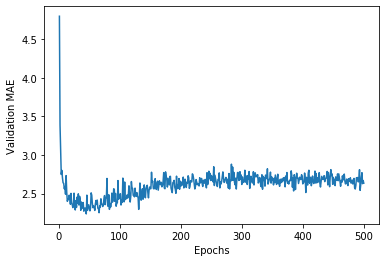

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

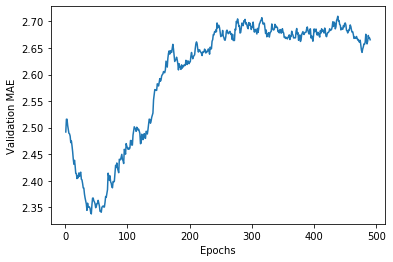

In [14]:
smoothed_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
model2 = build_model()
model2.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

test_mae_score

102/102 [==============================] - 0s 39us/step


2.718790063671037